# Neural Networks with a Deep Learning Framework - PyTorch

In Practical9a.ipynb, we will first look at the same problem from the Practical 8 - classification of sklearn "moons".


General imports:

In [19]:
%matplotlib inline  
import numpy as np
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegressionCV
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import torch
import torch.nn as nn

Generate "moons" dataset

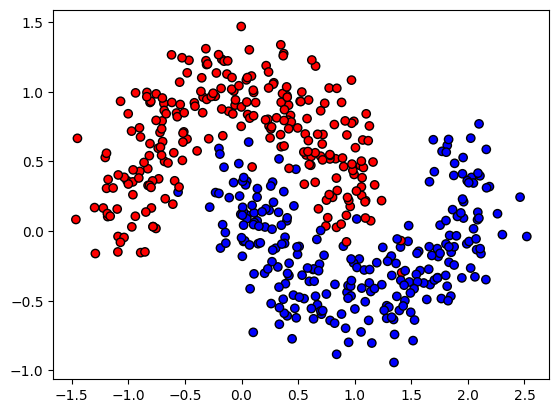

[[ 1.09679464e+00  2.18529079e-01]
 [ 5.99214288e-01 -3.60624534e-01]
 [ 4.33328389e-01  8.30265890e-01]
 [ 1.14159721e+00  7.39300385e-02]
 [-3.43166059e-01  8.49589887e-01]
 [ 8.99910189e-01 -1.08339069e-01]
 [ 9.02763017e-01  4.62757766e-01]
 [-5.10054649e-01  7.12028616e-01]
 [ 5.32744539e-01  9.97970637e-01]
 [ 1.66672722e+00 -3.84366384e-01]
 [ 1.86525560e+00  1.53769749e-01]
 [ 1.96145778e+00  9.34638275e-02]
 [-6.80598895e-02  1.00529828e+00]
 [ 1.06229732e+00 -4.09155255e-01]
 [ 8.84200286e-01  9.23587019e-01]
 [ 9.30942173e-01  6.89791200e-01]
 [ 1.05596360e+00 -7.23927540e-01]
 [-7.56125153e-01  1.88675457e-02]
 [ 2.44378087e-01  1.49315173e-01]
 [ 1.57769294e+00 -2.84030908e-01]
 [ 7.45446698e-01  3.68416514e-02]
 [-8.26009636e-01  3.27979713e-01]
 [ 4.00709000e-01  7.38822590e-02]
 [-1.01264974e+00  3.62405280e-01]
 [-9.60870075e-01  3.53064263e-01]
 [ 1.12926397e+00 -3.72374373e-01]
 [ 1.56551217e+00 -1.45112068e-01]
 [ 1.46600701e-01 -9.05224665e-02]
 [ 1.10160453e+00  8

In [23]:
X, y = make_moons(n_samples = 500, noise = 0.2, random_state = 101)

# visualisation
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], c = y, edgecolors='k', cmap = cm_bright)
plt.show(); # NB: adding ";" to the end
print(X); # NB: adding ";" to the end
print(y); # NB: adding ";" to the end

## Before jumping into making a neural network, let's look at PyTorch Tensors

- __Tensors__
    - Tensors are similar to NumPy’s ndarrays, with the addition being that Tensors can also be used on a GPU to accelerate computing. 
    - To aid usability for those used to using NumPY, PyTorch adopt a similar API.

Let's look at creating NumPy arrays and PyTorch Tensors and compare.

In [3]:
# numpy array construction from a Python list
my_list = [[1,2,3],[4,5,6]]
first_array = np.array(my_list) # 2x3 array
print("Array Type: {}".format(type(first_array))) # type
print("Array Shape: {}".format(np.shape(first_array))) # shape
print(first_array)

Array Type: <class 'numpy.ndarray'>
Array Shape: (2, 3)
[[1 2 3]
 [4 5 6]]


In [4]:
# pytorch Tensor construction from a Python list
tensor = torch.Tensor(my_list)
print("Array Type: {}".format(tensor.type)) # type
print("Array Shape: {}".format(tensor.shape)) # shape
print(tensor)

Array Type: <built-in method type of Tensor object at 0x7fb075ba9270>
Array Shape: torch.Size([2, 3])
tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [5]:
# empty arrays and Tensors are equivalent
print('numpy ones')
print(np.empty((2,3)))

print('pytorch ones')
print(torch.empty((2,3)))

numpy ones
[[0. 0. 0.]
 [1. 1. 0.]]
pytorch ones
tensor([[2.2303e+23, 4.5807e-41, 1.6895e-34],
        [0.0000e+00, 4.4842e-44, 0.0000e+00]])


In [6]:
# arrays and Tensors of ones are equivalent
print('numpy ones')
print(np.ones((2,3)))

print('pytorch ones')
print(torch.ones((2,3)))

numpy ones
[[1. 1. 1.]
 [1. 1. 1.]]
pytorch ones
tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [7]:
# arrays and Tensors of random numbers are equivalent
print('numpy random')
print(np.random.rand(2,3)) # not fewer parentheses here - `np.random.rand()` takes two integers as inputs, whereas `np.ones()` takes a shape tuple

print('pytorch ones')
print(torch.rand((2,3)))

numpy random
[[0.50406141 0.02474012 0.87696684]
 [0.49673609 0.98014522 0.68832168]]
pytorch ones
tensor([[0.8358, 0.8987, 0.7009],
        [0.9369, 0.4428, 0.0265]])


We can also convert between NumPy arrays and PyTorch Tensors

In [8]:
# from numpy to tensor
array = np.array([[1,2,3],[4,5,6]])
print(type(array))
print(array)
tensor = torch.from_numpy(array)
print(type(tensor))
print(tensor)

# from tensor to numpy
array2 = tensor.numpy()
print(type(array2))
print(array2)

<class 'numpy.ndarray'>
[[1 2 3]
 [4 5 6]]
<class 'torch.Tensor'>
tensor([[1, 2, 3],
        [4, 5, 6]])
<class 'numpy.ndarray'>
[[1 2 3]
 [4 5 6]]


In [9]:
# Finally, we often need to see the shape of an array or tensor
print(array.shape)
print(tensor.shape)

(2, 3)
torch.Size([2, 3])


## Building a neural network - `tensor`, `autograd`, `torch.nn`, `forward()` and `backward()`

### Neural Networks


Neural networks can be constructed using the `torch.nn` package.

- `nn` depends on `autograd` to define models and differentiate them ())producing gradients).
- An `nn.Module` contains layers, and a method `forward(input)` that
returns the `output`.


A typical training procedure for a neural network is as follows:

- Define the neural network that has some learnable parameters (or
  weights)
- Iterate over a dataset of inputs
- Process input through the network
- Compute the loss (how far is the output from being correct)
- Propagate gradients back into the network’s parameters
- Update the weights of the network, typically using a simple update rule:
  ``weight = weight - learning_rate * gradient``

### Define the network


Let’s define this network:

In [18]:
class ANN(nn.Module): ## construct a class extending nn.Module
    
    def __init__(self, n_hidden):
        super(ANN, self).__init__()
        self.i_h = nn.Sequential(nn.Linear(2, n_hidden), nn.Sigmoid()) # input layer taking 2 features (x and y coordinates of a point) and producing n_hidden features
        self.h_o = nn.Sequential(nn.Linear(n_hidden, 1), nn.Sigmoid()) # output layer taking n_hidden features and producing 1 feature (the classification)
        
    def forward(self, x): # produce output given input by using input and output layers
        h = self.i_h(x)
        output = self.h_o(h)
        return output
    
n_hidden = 30
net = ANN(n_hidden = n_hidden) # initialse an ANN object with n_hidden = 30 
print(net)

ANN(
  (i_h): Sequential(
    (0): Linear(in_features=2, out_features=30, bias=True)
    (1): Sigmoid()
  )
  (h_o): Sequential(
    (0): Linear(in_features=30, out_features=1, bias=True)
    (1): Sigmoid()
  )
)


We have defined the `forward()` function. `autograd` will define the `backward()` function for us in the following steps.

To see the tensors for features, weights and biases of our layers, use `state_dict()`:

In [19]:
print(net.state_dict())

OrderedDict([('i_h.0.weight', tensor([[-0.2563,  0.5838],
        [ 0.6662, -0.4356],
        [ 0.2654, -0.0638],
        [ 0.3963,  0.4592],
        [ 0.1925, -0.1285],
        [-0.5418,  0.0540],
        [-0.1715, -0.0947],
        [-0.1399, -0.3093],
        [-0.5965, -0.3417],
        [-0.3444,  0.5034],
        [ 0.4718,  0.1317],
        [-0.2861, -0.6605],
        [ 0.6961,  0.3685],
        [-0.6529,  0.3312],
        [-0.2022, -0.0973],
        [-0.6815, -0.4990],
        [-0.4945, -0.6565],
        [-0.1410,  0.3552],
        [-0.6336, -0.0922],
        [ 0.7041,  0.6154],
        [-0.2388, -0.5107],
        [ 0.0685, -0.5441],
        [-0.5295,  0.5599],
        [ 0.5396,  0.1441],
        [-0.6049,  0.2874],
        [-0.4833,  0.4213],
        [ 0.1590,  0.3535],
        [-0.6357, -0.2278],
        [ 0.6036, -0.4353],
        [ 0.6514, -0.1037]])), ('i_h.0.bias', tensor([ 0.6272,  0.6053, -0.4206, -0.3914, -0.4056, -0.0134,  0.5000, -0.1600,
        -0.4091, -0.4159,  0.059

With our nerual network setup, we now need a loss function.

`torch.nn` provides a number of predefined loss functions [https://pytorch.org/docs/stable/nn.html#loss-functions](), of which we will choose the Binary Cross-entropy.

In [20]:
# data to tensor
X_tensor = torch.tensor(X, dtype = torch.float)
target = torch.tensor(y, dtype=torch.float32).view(-1,1) # `torch.tensor.view()` is equivalent to np.reshape() - here we swap rows and columns to get y into the shape we need

y_output = net(X_tensor) # calculating y_output produces the predicted y values
loss_fn = nn.BCELoss(reduction="sum")
loss = loss_fn(y_output, target) # the loss is the difference between predicted and target values according to the loss function
print(loss)

tensor(362.5514, grad_fn=<BinaryCrossEntropyBackward0>)


### Backpropagation

To backpropagate:
- clear previous gradients in the neural network
- use `loss.backward()` to backpropagate the errors.

That's it!

In [21]:
#note, running this cell more than once will raise a runtime error as loss.backward() should only be run once.
net.zero_grad()
print([p.grad for p in net.parameters()])
loss.backward()
print([p.grad for p in net.parameters()])

[None, None, None, None]
[tensor([[-2.5641,  2.1591],
        [-0.0176,  0.0254],
        [-1.9721,  1.9578],
        [-0.7524,  0.7871],
        [ 1.0803, -1.0540],
        [ 1.3753, -1.6127],
        [ 3.3393, -3.3398],
        [ 1.8213, -1.7838],
        [-0.1005,  0.1126],
        [-0.8087,  0.9525],
        [-3.6016,  4.0124],
        [-1.7579,  1.6426],
        [ 1.4125, -1.6269],
        [-1.5762,  1.7355],
        [-3.9539,  3.9901],
        [-4.0855,  4.6935],
        [-2.4246,  2.5212],
        [-1.2367,  1.0992],
        [-3.9769,  4.5972],
        [-1.2738,  1.4596],
        [-0.8474,  0.8013],
        [-1.0060,  1.0625],
        [-0.5129,  0.7008],
        [ 0.0408, -0.0433],
        [ 1.4269, -1.6552],
        [ 2.2408, -2.2633],
        [-2.0932,  2.1595],
        [ 0.3754, -0.4423],
        [ 1.6100, -1.9981],
        [ 1.7751, -2.3367]]), tensor([ 0.4204,  0.0184,  0.7248,  0.3236, -0.3893, -0.7810, -1.3284, -0.7252,
         0.0587,  0.5481,  1.8830,  0.6113, -0.9085,

### Update weights - optimisation

- in the previous practical we defined a Stochastic Gradient Descent optimiser in NumPy
- with PyTorch, we will simply chose the optimiser from `torch.optim`
- in `torch.optim.SGD()` we provide the parameters of the model, the learning rate (lr) and the momentum
- for more reading on initialisation of lr and momentum, see [http://www.cs.toronto.edu/%7Ehinton/absps/momentum.pdf](http://www.cs.toronto.edu/%7Ehinton/absps/momentum.pdf).

In [14]:
optimiser = torch.optim.SGD(net.parameters(), lr=0.001, momentum=0.0)

- _Try printing the parameters of the model before an after making an optimisation step (`optimiser.step()`) to see the difference._

## Run the model optimisation

In [15]:
%%time
n_hidden = 30
net = ANN(n_hidden = n_hidden)

# optimizer
lr = 0.001
optimizer = torch.optim.SGD(net.parameters(), lr=lr, momentum=0.)

# loss function
loss_fn = torch.nn.BCELoss(reduction="sum")

# data to tensor
X_tensor = torch.tensor(X, dtype = torch.float)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1,1)

# training
n_epochs = 10000
for epoch in range(n_epochs):
    optimizer.zero_grad()
    y_pred = net(X_tensor)
    loss = loss_fn(y_pred, y_tensor)
    loss.backward()
    optimizer.step()
    
    if epoch%100 == 0:
        print("Iteration {}/{}, loss {:.4f}".format(epoch, n_epochs, loss.item()))

Iteration 0/10000, loss 354.7866
Iteration 100/10000, loss 153.2027
Iteration 200/10000, loss 139.3797
Iteration 300/10000, loss 137.3389
Iteration 400/10000, loss 136.9523
Iteration 500/10000, loss 136.8233
Iteration 600/10000, loss 136.7386
Iteration 700/10000, loss 136.6616
Iteration 800/10000, loss 136.5837
Iteration 900/10000, loss 136.5011
Iteration 1000/10000, loss 136.4093
Iteration 1100/10000, loss 136.3025
Iteration 1200/10000, loss 136.1717
Iteration 1300/10000, loss 136.0027
Iteration 1400/10000, loss 135.7712
Iteration 1500/10000, loss 135.4344
Iteration 1600/10000, loss 134.9126
Iteration 1700/10000, loss 134.0545
Iteration 1800/10000, loss 132.5795
Iteration 1900/10000, loss 130.0274
Iteration 2000/10000, loss 125.8423
Iteration 2100/10000, loss 119.7322
Iteration 2200/10000, loss 112.0532
Iteration 2300/10000, loss 103.6867
Iteration 2400/10000, loss 95.5149
Iteration 2500/10000, loss 88.0783
Iteration 2600/10000, loss 81.5748
Iteration 2700/10000, loss 75.9956
Iteratio

__Plot the resulting decision boundaries of the model__

__Can you understand each line of the cell below? - What is different now we are using PyTorch?__

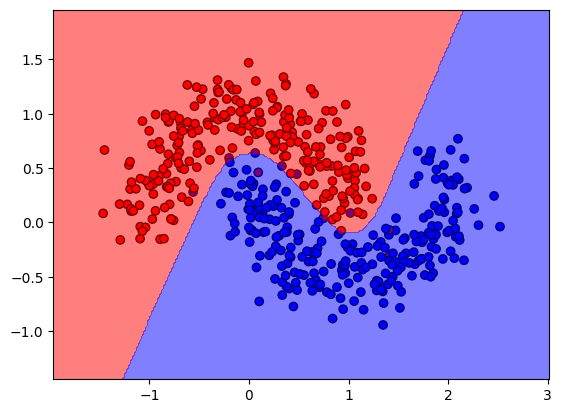

In [16]:
# plotting 
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = 0.02 # step in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
xx_tensor, yy_tensor = torch.tensor(xx, dtype=torch.float), torch.tensor(yy, dtype=torch.float)
Z = net(torch.stack([xx_tensor.flatten(), yy_tensor.flatten()], 1))
Z = Z.detach().numpy()
Z = Z.reshape(xx.shape)
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], c = y.ravel(), edgecolors='k', cmap = cm_bright)
Z_binary = Z>=0.5
Z_binary = Z_binary.reshape(xx.shape)
ax.contourf(xx, yy, Z_binary, cmap=cm_bright, alpha=.5);

## This was equivalent to the NumPy training in the previous practical in terms of the number of epochs, features, optimiser and loss function

## Did it perform more quickly?
Remember, PyTorch tensors are equivalent to NumPy arrays, but they can be used efficiently on GPUs - _should_ this optimisation run more quickly than the NumPy-based one?